In [523]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [524]:
data = pd.read_csv('hmelq.csv')
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [525]:
data = data.dropna() 
data.isnull().sum().any()

False

In [526]:
data.shape

(2018, 13)

In [527]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [528]:
data['bad'].value_counts()

0    1840
1     178
Name: bad, dtype: int64

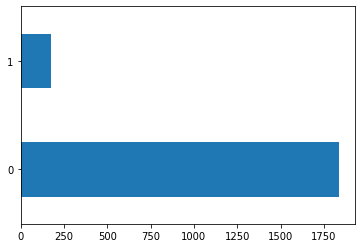

In [529]:
data['bad'].value_counts().plot.barh()

In [530]:
dms = pd.get_dummies(data[["reason", "job"]])
dms.tail()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
3544,0,1,0,0,0,0,0,1
3546,0,1,0,0,0,0,0,1
3547,1,0,0,0,0,0,0,1
3548,0,1,0,0,0,0,0,1
3549,0,1,0,0,0,0,0,1


In [531]:
y=data["bad"]
X_ = data.drop(["reason", "job", "bad"], axis=1).astype("float64")
X= pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_Other", "job_ProfEx", "job_Sales"]]], axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0


In [534]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1816, 16)
y_train shape: (1816,)
X_test shape: (202, 16)
y_test shape: (202,)


In [535]:
#stats models ile datamızı eğittik
loj = sm.Logit(y_train,X_train).fit()
loj.summary()

Optimization terminated successfully.
         Current function value: 0.239623
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1816
Model:                          Logit   Df Residuals:                     1800
Method:                           MLE   Df Model:                           15
Date:                Tue, 24 Sep 2019   Pseudo R-squ.:                  0.1963
Time:                        22:10:39   Log-Likelihood:                -435.15
converged:                       True   LL-Null:                       -541.41
Covariance Type:            nonrobust   LLR p-value:                 6.031e-37
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.622e-05   1.12e-05     -2.340      0.019   -4.82e-05   -4.26e-06
mortdue        -3.293e-06    5.2e-06     -0.633      0.527   -1.35e-05     6.9e-06
value           1.011e-06   4.51e-06      0.224      0.823   -7.83e-06    9.86e-06
yoj               -0.0153      0.014     -1.097      0.273      -0.043       0.012
derog              0.5877      0.134      4.373      0.000       0.324       0.851
delinq             0.7699      0.097      7.951      0.000       0.580       0.960
clage             -0.0068      0.001     -4.729      0.000      -0.010      -0.004
ninq               0.0698      0.050      1.395      0.163      -0.028       0.168
clno              -0.0348      0.011     -3.132      0.002      -0.057      -0.013
debtinc            0.0663      0.011      6.166      0.000       0.045       0.087
reason_DebtCon    -0.0958      0.201     -0.476      0.634      -0.490       0.298
job_Mgr           -2.5233      0.380     -6.638      0.000      -3.268      -1.778
job_Office        -3.1100      0.403     -7.708      0.000      -3.901      -2.319
job_Other         -2.6787      0.329     -8.144      0.000      -3.323      -2.034
job_ProfEx        -2.5684      0.352     -7.307      0.000      -3.257      -1.879
job_Sales         -1.5672      0.668     -2.346      0.019      -2.877      -0.258
==================================================================================
"""

In [536]:
#pvalue değeri 0.05 den büyük olan featureları siliyorum
X = X.drop(['mortdue','value','yoj','ninq','reason_DebtCon'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [537]:
#sklearn ile datamızı eğittik
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear") 
loj_model= loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [538]:
print('intercept_ :',loj_model.intercept_)
print('coefficent :', loj_model.coef_)

intercept_ : [-1.08930849]
coefficent : [[-2.45633478e-05  6.12564045e-01  7.80288485e-01 -8.16429542e-03
  -4.31749806e-02  3.93505661e-02 -1.48011341e-01 -4.95575481e-01
  -4.68105902e-01 -2.57566534e-01  1.17007911e-01]]


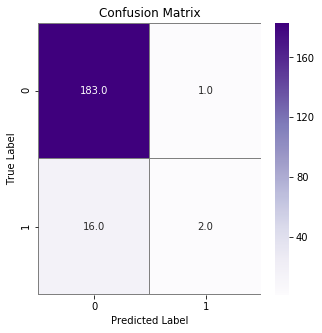

In [539]:
#tahmin ve model tuning
y_pred = loj_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [540]:
accuracy_score(y_test, y_pred)

0.9158415841584159

In [541]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       184
           1       0.67      0.11      0.19        18

    accuracy                           0.92       202
   macro avg       0.79      0.55      0.57       202
weighted avg       0.90      0.92      0.89       202



In [542]:
loj_model.predict(X_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [543]:
loj_model.predict_proba(X_test)[0:5][:,0:2]
#0.04 ihtimalle 1 olabilir 0.94 ihtimalle 0 olabilir olasılık veriyor toplamları 1 olmalı

array([[0.957918  , 0.042082  ],
       [0.96009813, 0.03990187],
       [0.95961369, 0.04038631],
       [0.98296788, 0.01703212],
       [0.84758039, 0.15241961]])

In [544]:
y_test[0:5]

2400    0
800     0
663     0
2782    0
703     0
Name: bad, dtype: int64

In [545]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
#1e yakın olmalı
print('logit_roc_auc: \n\n', logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
print('fpr: \n\n', fpr[0:10])
print('tpr: \n\n', tpr[0:10])
print('thresholds: \n\n', thresholds[0:10])

logit_roc_auc: 

 0.5528381642512077
fpr: 

 [0.         0.00543478 0.00543478 0.0326087  0.0326087  0.05978261
 0.05978261 0.0923913  0.0923913  0.19565217]
tpr: 

 [0.         0.         0.27777778 0.27777778 0.44444444 0.44444444
 0.61111111 0.61111111 0.66666667 0.66666667]
thresholds: 

 [1.74636194 0.74636194 0.3347621  0.27058738 0.24316271 0.20511524
 0.19260815 0.18106605 0.17934464 0.12129018]


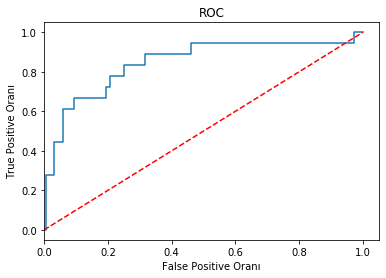

In [546]:
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [566]:
#cross validation
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train_index, test_index in sss.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]

    X_test  = X.iloc[test_index]
    y_test  = y.iloc[test_index]


In [567]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear") 
loj_model= loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

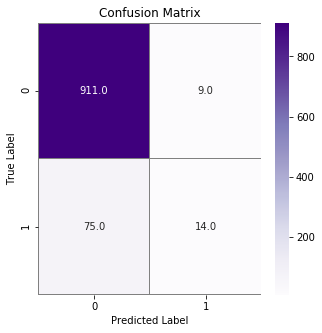

In [568]:
y_pred = loj_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [569]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       920
           1       0.61      0.16      0.25        89

    accuracy                           0.92      1009
   macro avg       0.77      0.57      0.60      1009
weighted avg       0.90      0.92      0.89      1009



In [570]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9167524752475247